# Математическое моделирование колебательного контура

## Постановка задачи
Дана электрическая схема, состоящая из идеального конденсатора ёмкостью $С=1Ф$, идеального индуктора индуктивностью $L=1Гн$
и заземления. Пусть в начальный момент времени конденсатор заряжен до $1 В$, а ток в цепи отсутствует.
<br>
![circuit.png](circuit.png)
</br>
Необходимо:
1. Составить соответствующую схеме задачу Коши для системы обыкновенных дифференциальных уравнений
и решить её любым численным методом на интервале $t\in[0; 100]$. Использование готовых решателей для интегрирования задачи Коши **запрещается**.
2. Построить графики $I(t)$ и $U(t)$.

## Решение
### Математическая модель
Сперва напишем систему уравнений, описывающих поведение цепи. Для этого воспользуемся правилами Кирхгофа и запишем следующие соотношения:
$$
\begin{cases}
u_C(t) + u_L(t) = 0 \\
i_C(t) = i_L(t) = i
\end{cases}
$$
Где:
$$
u_L(t) = L\frac{di_L(t)}{d t} \\
i_C(t)=C\frac{du_C(t)}{d t}
$$
Преобразуем уравнения относительно тока:
$$
L\frac{di(t)}{d t} + \frac{1}{C}\int\limits_ti(t)dt=0
$$
Продифференцируем обе части уравнения и получим обыкновенное дифференциальное уравнение (ОДУ) второго порядка:
$$
\frac{d^2 i(t)}{d^2 t} + \frac{1}{LC} i(t) = 0
$$
Заменим переменные:
$$
i(t)=y_1 \\ 
\frac{di(t)}{d t}=y_2
$$
Тогда мы можем сделать окончательную постановку задачи Коши для заданного электрического контура (сразу в векторном виде):
$$
\begin{cases}
\frac{d}{d t}\binom{y_1}{y_2}=\binom{y_2}{- \frac{1}{LC}y_1} \\
y_1(t_0) = 0 \\
y_2(t_0) = - \frac{U_C}{L} = 1 \\
t\in[0; 100]
\end{cases}
$$
Реализация данной модели показана в файле **model.py**
### Реализация численного метода
Для решения поставленной задачи Коши были реализованы решатели (см. файл **solver.py**):
1. [Метод Эйлера](https://en.wikipedia.org/wiki/Euler_method). 
2. [Неявный метод Эйлера](https://en.wikipedia.org/wiki/Backward_Euler_method)
3. [Метод Рунге-Кутта](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

### Аналитическое решение
Решением полученного выше ОДУ являются следующие выражения:
$$
\begin{cases}
I(t)=I_0\cos (\omega_0 t + \phi) \\
U_C(t)=-L\frac{dI(t)}{d t}=\omega_0 L I_0 \sin (\omega_0 t + \phi)\\
\end{cases}
$$
Где
$$
\omega_0=\frac{1}{\sqrt {LC}} \text{ - собственная частота гармонических колебаний} \\
I_0, \phi \text{ - амплитуда и начальная фаза колебаний}
$$
Найдем значения амплитуды и фазы колебаний, а также посчитаем собственную частоту колебаний.
Сперва найдем частоты:
$$
\omega_0=\frac{1}{\sqrt {LC}}=\frac{1}{\sqrt {1Гн1Ф}}=1\frac{рад}{сек}\\
f_0 = \frac{\omega_0}{2\pi}=\frac{1}{2\pi}\approx0.16 Гц
$$
Теперь можем определить амплитуду и фазу колебаний. Подставим в полученные выше выражения начальные условия и известные значения:
$$
\begin{cases}
I(t_0)=I_0\cos (\phi)=0 \\
U_C(t_0)=I_0 \sin (\phi)=1 \\
\end{cases}
$$
Решим систему и получим следующие значения амплитуды и фазы:
$$
I_0=1 \\
\phi=\frac{\pi}{2}
$$
Окончательно аналитическое решение принимает вид:
$$
\begin{cases}
I(t)=\cos (t + \frac{\pi}{2})=-\sin (t) \\
U_C(t)=\sin (t + \frac{\pi}{2}) = \cos (t)
\end{cases}
$$
<br>
<br>

## Анализ полученного решения
Построим графики переходных процессов, полученные разными решателями и сравним с аналитическим решением (код симуляции см. в файле **simulation.py**)

In [1]:
# Импортируем нужные библиотеки и инициализируем параметры условия задачи

from simulation import Simulation
from solver import SimpleEulerSolver, BackwardEulerSolver, SimpleRungeKutta
import matplotlib.pyplot as plt
import numpy as np

INDUCTANCE = 1 # Гн, индуктивность катушки
CAPACITANCE = 1 # Ф, ёмкость конденсатора
INITIAL_CURRENT = 0 # А, ток в начальный момент
INITIAL_VOLTAGE = 1 # В, заряд конденсатора в начальный момент
STEP_SIZE = 0.001 # с, шаг по времени
SIMULATION_TIME = 100 # c, время симуляции

In [2]:
# Инициализируем разные решатели

euler = Simulation(
    inductance=INDUCTANCE,
    capacitance=CAPACITANCE,
    initial_current=INITIAL_CURRENT,
    initial_voltage=INITIAL_VOLTAGE,
    step_size=STEP_SIZE,
    simulation_time=SIMULATION_TIME,
    solver=SimpleEulerSolver
)

backward_euler = Simulation(
    inductance=INDUCTANCE,
    capacitance=CAPACITANCE,
    initial_current=INITIAL_CURRENT,
    initial_voltage=INITIAL_VOLTAGE,
    step_size=STEP_SIZE,
    simulation_time=SIMULATION_TIME,
    solver=BackwardEulerSolver
)

runge_kutta = Simulation(
    inductance=INDUCTANCE,
    capacitance=CAPACITANCE,
    initial_current=INITIAL_CURRENT,
    initial_voltage=INITIAL_VOLTAGE,
    step_size=STEP_SIZE,
    simulation_time=SIMULATION_TIME,
    solver=SimpleRungeKutta
)

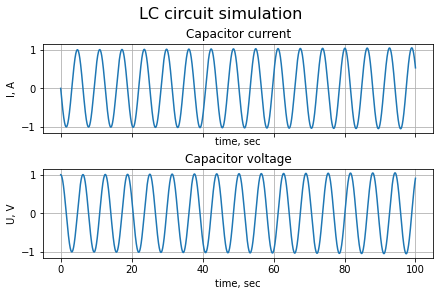

In [3]:
# Проведём симуляции моделей и посмотрим переходные процессы 
# модели с решателем методом Эйлера 

euler.start_simulation()
backward_euler.start_simulation()
runge_kutta.start_simulation()

euler.show_plots()

In [4]:
# Сравним время, необходимое каждому из решателей для выполнения расчётов

print('Время, затраченное на численно моделирование')
print(
    f'1. Решатель методом Эйлера: {euler.model.solving_time:.3f} с'
)
print(
    f'2. Решатель неявным методом Эйлера: {backward_euler.model.solving_time:.3f} с'
)
print(
    f'3. Решатель методом Рунге-Кутты: {runge_kutta.model.solving_time:.3f} с'
)

Время, затраченное на численно моделирование
1. Решатель методом Эйлера: 19.294 с
2. Решатель неявным методом Эйлера: 18.614 с
3. Решатель методом Рунге-Кутты: 18.846 с


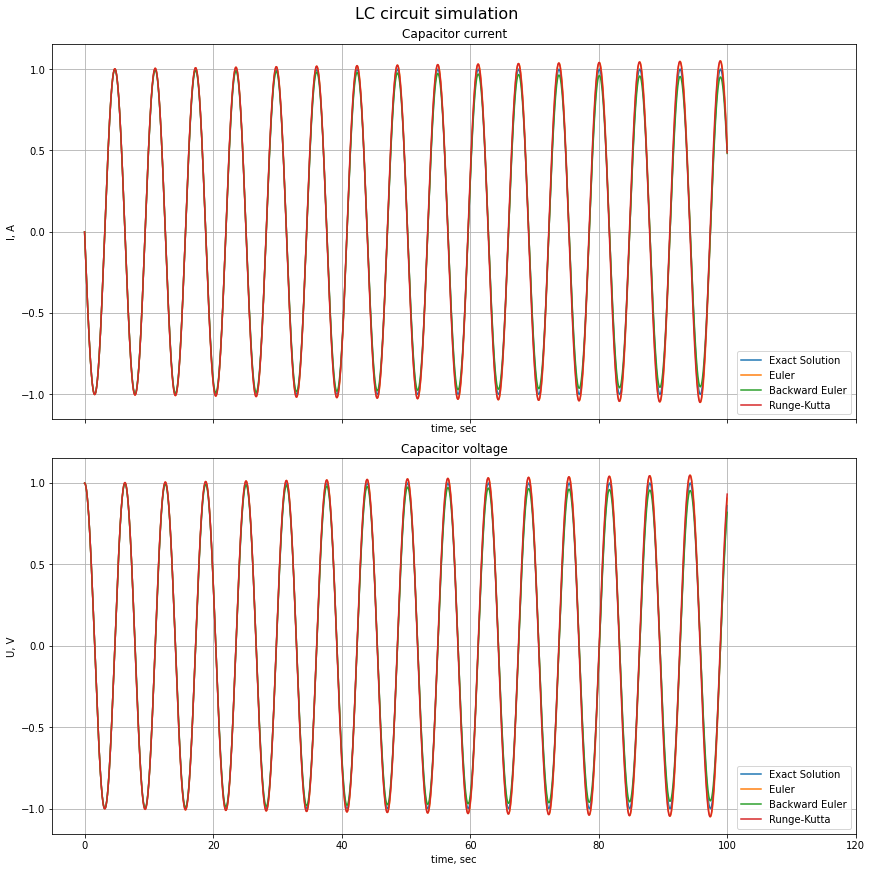

In [9]:
# Cведём переходные процессы на один график для анализа

fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', sharex=True)
ax1.plot(
    euler.solver.time_steps,
    -np.sin(euler.solver.time_steps),
)
ax1.plot(
    euler.solver.time_steps,
    euler.model.state[1:, 0],
)
ax1.plot(
    backward_euler.solver.time_steps,
    backward_euler.model.state[1:, 0],
)
ax1.plot(
    runge_kutta.solver.time_steps,
    runge_kutta.model.state[1:, 0]
)
ax1.set_title('Capacitor current')
ax1.set_xlabel('time, sec')
ax1.set_ylabel('I, A')
ax1.legend(
    ['Exact Solution', 'Euler', 'Backward Euler', 'Runge-Kutta'], 
    loc='lower right'
)
ax1.set_xlim(right=120)
ax1.grid()

ax2.plot(
    euler.solver.time_steps,
    np.cos(euler.solver.time_steps),
)
ax2.plot(
    euler.solver.time_steps,
    euler.model.state[1:, 1],
)
ax2.plot(
    backward_euler.solver.time_steps,
    backward_euler.model.state[1:, 1],
)
ax2.plot(
    runge_kutta.solver.time_steps,
    runge_kutta.model.state[1:, 1]
)
ax2.set_title('Capacitor voltage')
ax2.set_ylabel('U, V')
ax2.set_xlabel('time, sec')
ax2.legend(
    ['Exact Solution', 'Euler', 'Backward Euler', 'Runge-Kutta'], 
    loc='lower right'
)
ax2.set_xlim(right=120)
ax2.grid()

fig.suptitle('LC circuit simulation', fontsize=16)

plt.rcParams['figure.figsize'] = [12, 12]
plt.show()

In [6]:
# Посчитаем абсолютную ошибку решателей относительно аналитического решения

exact_solution_current = -np.sin(euler.solver.time_steps)
exact_solution_voltage = np.cos(euler.solver.time_steps)

euler_error = np.array([
    np.abs(euler.model.state[1:, 0] - exact_solution_current),
    np.abs(euler.model.state[1:, 1] - exact_solution_voltage),
])

backward_euler_error = np.array([
    np.abs(backward_euler.model.state[1:, 0] - exact_solution_current),
    np.abs(backward_euler.model.state[1:, 1] - exact_solution_voltage),
])

runge_kutta_error = np.array([
    np.abs(runge_kutta.model.state[1:, 0] - exact_solution_current),
    np.abs(runge_kutta.model.state[1:, 1] - exact_solution_voltage),
])

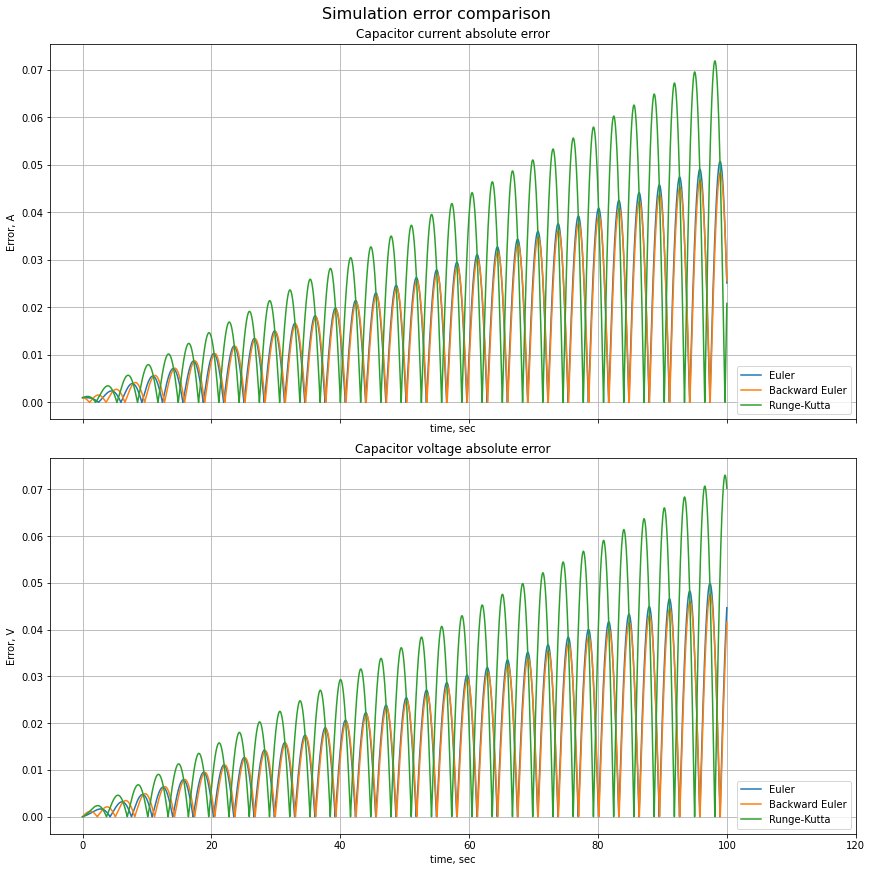

In [7]:
# Сравним абсолютную ошибку решателей и накопление погрешности

fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', sharex=True)

ax1.plot(
    euler.solver.time_steps,
    euler_error[0],
)
ax1.plot(
    backward_euler.solver.time_steps,
    backward_euler_error[0],
)
ax1.plot(
    runge_kutta.solver.time_steps,
    runge_kutta_error[0]
)
ax1.set_title('Capacitor current absolute error')
ax1.set_xlabel('time, sec')
ax1.set_ylabel('Error, A')
ax1.legend(['Euler', 'Backward Euler', 'Runge-Kutta'], loc='lower right')
ax1.set_xlim(right=120)
ax1.grid()

ax2.plot(
    euler.solver.time_steps,
    euler_error[1],
)
ax2.plot(
    backward_euler.solver.time_steps,
    backward_euler_error[1],
)
ax2.plot(
    runge_kutta.solver.time_steps,
    runge_kutta_error[1]
)
ax2.set_title('Capacitor voltage absolute error')
ax2.set_ylabel('Error, V')
ax2.set_xlabel('time, sec')
ax2.legend(['Euler', 'Backward Euler', 'Runge-Kutta'], loc='lower right')
ax2.set_xlim(right=120)
ax2.grid()

fig.suptitle('Simulation error comparison', fontsize=16)

plt.rcParams['figure.figsize'] = [12, 12]
plt.show()

### Выводы

Из полученных графиков можно сделать следующие выводы:
1. Полученные графики показывают, с одной стороны - согласованность с теорией, говорящей о колебательном процессе в контуре с определённой частотой. С другой стороны - видно накопление ошибки, вызванное погрешностью реализованных здесь методов.
2. Реализованные решатели показали свою применимость проведения моделирования переходных процессов в колебательном контуре на ограниченном временном интервале.

Кроме того, полученные модули model.py, solver.py и simulation.py созданы в ООП парадигме, что позволяет автоматизировать исследования и численное моделирование LC-контуров с различными параметрами. Возможно как добавление модификаций существующих, так и создание новых решателей без масштабных изменений в коде. В дальнейшем реализованную модель также легко можно модифицировать на более широкий класс LCR-контуров, что сделает её более универсальной.

Codestyle проверен flake8 и pyflakes.